<a href="https://colab.research.google.com/github/Tempester15/Iris-flower-classification-project/blob/main/IRIS_flower_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch as t
import torch.nn as nn
import torch.nn.functional as f
from torch.utils.data import TensorDataset, DataLoader

#Importing the Dataset

In [50]:
dataPath = "IRIS.csv"
iris = pd.read_csv(dataPath)
iris2 = iris.copy()
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#Preliminary Data analysis

In [51]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [52]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [53]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#Data Preprocessing

##1. Normalizing numerical columns

<Axes: >

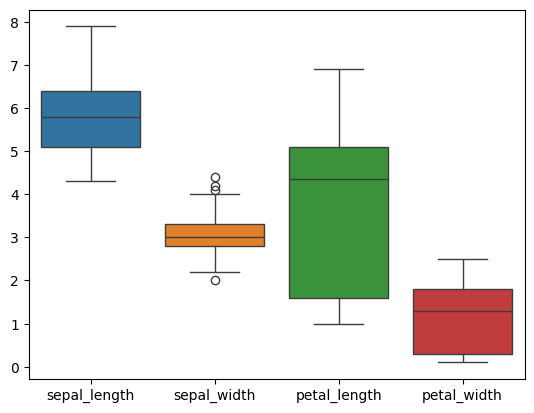

In [54]:
sns.boxplot(data = iris)

As we can see that all the features are in the different data range hence, normalizing the features using Z-score method

In [55]:
def normalizeCol(colName):
  mean = iris[colName].mean()
  std = iris[colName].std()
  iris[colName] = (iris[colName] - mean)/ std


normalizeCol('sepal_length')
normalizeCol('sepal_width')
normalizeCol('petal_length')
normalizeCol('petal_width')

In [56]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.028611,-1.336794,-1.308593,Iris-setosa
1,-1.139200,-0.124540,-1.336794,-1.308593,Iris-setosa
2,-1.380727,0.336720,-1.393470,-1.308593,Iris-setosa
3,-1.501490,0.106090,-1.280118,-1.308593,Iris-setosa
4,-1.018437,1.259242,-1.336794,-1.308593,Iris-setosa
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,Iris-virginica
146,0.551486,-1.277692,0.703536,0.918985,Iris-virginica
147,0.793012,-0.124540,0.816888,1.050019,Iris-virginica
148,0.430722,0.797981,0.930239,1.443121,Iris-virginica


<Axes: >

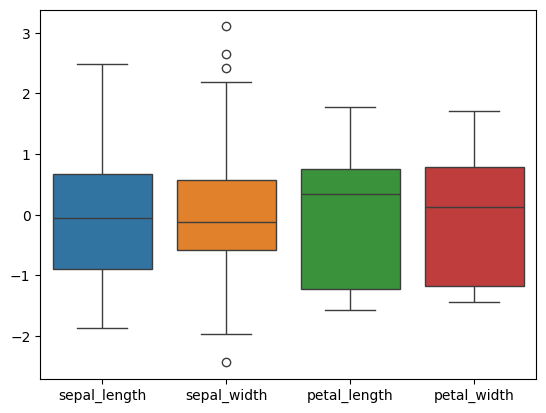

In [57]:
sns.boxplot(data = iris)

Hence all the data has come in the same range

##Encoding label

As the label data is not numeric therefore encoding it in discrete numbers will be much more useful to predict the flower species

In [58]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder() #this class encodes the label into numeric categories based on the unique categories present in our target data
iris['species'] = lr.fit_transform(iris['species'])
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,-0.897674,1.028611,-1.336794,-1.308593,0
1,-1.139200,-0.124540,-1.336794,-1.308593,0
2,-1.380727,0.336720,-1.393470,-1.308593,0
3,-1.501490,0.106090,-1.280118,-1.308593,0
4,-1.018437,1.259242,-1.336794,-1.308593,0
...,...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121,2
146,0.551486,-1.277692,0.703536,0.918985,2
147,0.793012,-0.124540,0.816888,1.050019,2
148,0.430722,0.797981,0.930239,1.443121,2


Note that -
*   0 - Iris-setosa
*   1 - Iris-versicolor
*   2 - Iris-virginica





Now our data is ready for feature selection

##Feature selection

<Axes: >

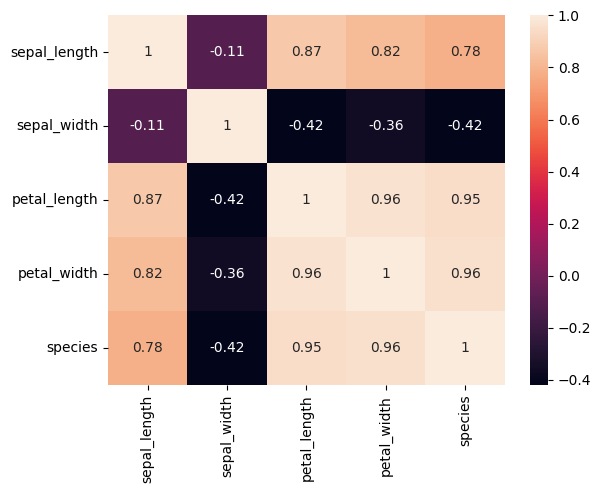

In [59]:
#constructing a heatmap to identify the strong features for predicting iris flower species
sns.heatmap(iris.corr(), annot = True)

From the heat map above we can see that



*   The column 'sepal_width' does not contribute in predicting the iris flower
species.

*   Hence, we can remove this column at the time of prediction





In [60]:
iris1 = iris.drop(columns = ['sepal_width'])
iris1

,sepal_length,petal_length,petal_width,species
0,-0.897674,-1.336794,-1.308593,0
1,-1.139200,-1.336794,-1.308593,0
2,-1.380727,-1.393470,-1.308593,0
3,-1.501490,-1.280118,-1.308593,0
4,-1.018437,-1.336794,-1.308593,0
...,...,...,...,...
145,1.034539,0.816888,1.443121,2
146,0.551486,0.703536,0.918985,2
147,0.793012,0.816888,1.050019,2
148,0.430722,0.930239,1.443121,2


#Splitting the dataset and creating a machine learning model

In [61]:
features = t.tensor(iris1.iloc[:, :-1].values).float()
labels = t.tensor(iris.iloc[:, -1].values).long()

In [62]:
labels

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2])

Splitting the dataset into training and test data

In [63]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size = 0.2, random_state = 42)
print(f"Shape of X-train : {x_train.shape}")
print(f"Shape of Y-train : {y_train.shape}")
print(f"Shape of X-test : {x_test.shape}")
print(f"Shape of Y-test : {y_test.shape}")

Shape of X-train : torch.Size([120, 3])
Shape of Y-train : torch.Size([120])
Shape of X-test : torch.Size([30, 3])
Shape of Y-test : torch.Size([30])


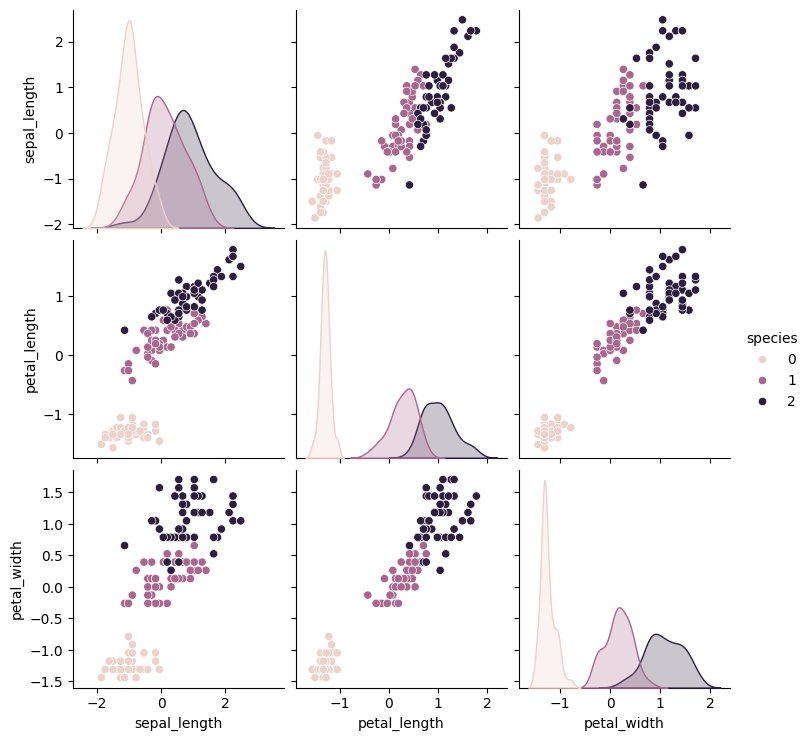

In [64]:
#Creating a pairplot to show the nature of a feature with other features
sns.pairplot(data = iris1, hue = 'species')

For this project, I chose an Artificial Neural Network (ANN) as the classification model for the Iris Flower Dataset. ANNs are powerful machine learning models that can capture complex patterns in data through multiple layers of interconnected neurons. Given the relatively small size and well-structured nature of the dataset, an ANN can effectively learn the relationships between the four input features (sepal length, sepal width, petal length, petal width) and classify the flowers into three species (Setosa, Versicolor, and Virginica).

For activation function I have choosen RELU i.e. rectified linear unit
by using ReLU in the hidden layers, the model can better capture complex relationships in the Iris dataset, leading to improved classification performance.

In [65]:
#custom ANN class
class irisANN(nn.Module):
  def __init__(self):
    super().__init__()
    self.input = nn.Linear(3, 10)
    self.hidden1 = nn.Linear(10, 10)
    self.output = nn.Linear(10, 3)

  def forward(self, x):
    x = f.relu(self.input(x))
    x = f.relu(self.hidden1(x))
    return self.output(x)

#function to create a model and select the meta paramters for the model
def createModel():
  model = irisANN()
  lossFunction = nn.CrossEntropyLoss()
  optimizer = t.optim.SGD(model.parameters(), lr = 0.05)

  return model, lossFunction, optimizer

I have kept :
*   Learning rate as 0.05
*   Number of epochs = 500



In [66]:
epochs = 500
def trainModel(model, lossfunc, opt):
  #taking a record of accuracy in program's runtime
  runTimeTrainAcc = []
  runTimeTestAcc = []
  #taking a record of losses in program's runtime
  losses = t.zeros((epochs))

  for i in range(epochs):
    #calculating the model output for training data
    yhat = model(x_train)

    #calculating the loss between predicted and target data
    loss = lossfunc(yhat, y_train)

    #backpropogation of losses
    opt.zero_grad()
    loss.backward()
    opt.step()

    #storing the run time losses
    losses[i] = loss.item()

    # calculating training accuracy for each cycle
    tracc = 100 * t.mean((t.argmax(yhat, axis = 1) == y_train).float()).item()
    # storing the training accuracy
    runTimeTrainAcc.append(tracc)

    #calculating the run time testing accuracy
    with t.no_grad():
      yPred = model(x_test)

    tacc = 100 * t.mean((t.argmax(yPred, axis = 1) == y_test).float()).item()
    runTimeTestAcc.append(tacc)

  return runTimeTrainAcc, runTimeTestAcc, losses

I have also recorded the run time training and testing accuracies and losses to see the visualizations of accuracies and losses during the model train

In [67]:
irisnet, lossfunc, opt = createModel()
train, test, losses = trainModel(irisnet, lossfunc, opt)


Text(0.5, 1.0, 'Final test accuracy =  100.00 and train accuracy =  95.00')

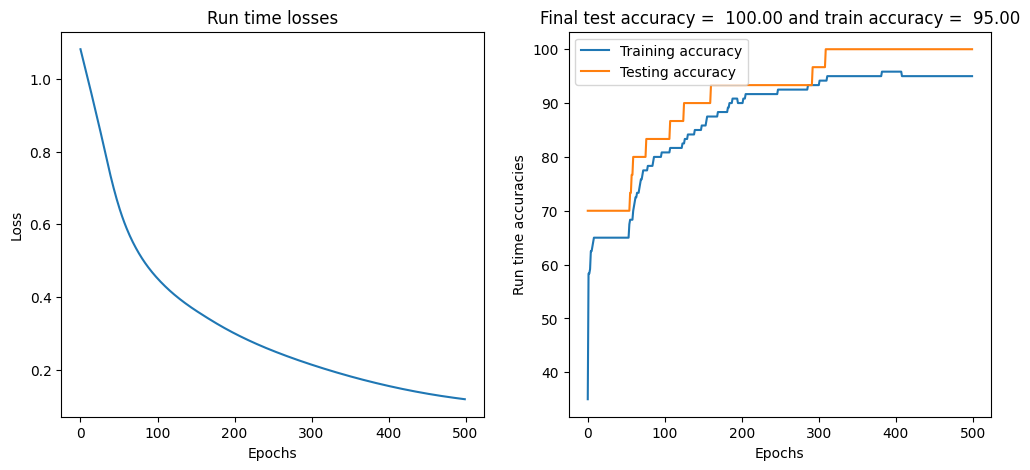

In [68]:
# plotting the results,
fig, ax = plt.subplots(1, 2, figsize = (12, 5))
ax[0].plot(losses, '-')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].set_title('Run time losses')

ax[1].plot(train)
ax[1].plot(test)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Run time accuracies')
ax[1].legend(['Training accuracy', 'Testing accuracy'])
ax[1].set_title(f"Final test accuracy = {test[-1] : 2.2f} and train accuracy = {train[-1] : 2.2f}")

#Performance evaluation

In [69]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, confusion_matrix

In [70]:
y_pred = irisnet(x_test)
y_pred = y_pred.detach()
print(f"accuracy score : {accuracy_score(y_test, np.argmax(y_pred, axis = 1))}")
print(f"f1 score : {f1_score(y_test, np.argmax(y_pred, axis = 1), average = 'weighted')}")
print(f"Precision score : {precision_score(y_test, np.argmax(y_pred, axis = 1), average = 'weighted')}")
print(f"Recall score : {recall_score(y_test, np.argmax(y_pred, axis = 1), average = 'weighted')}")

accuracy score : 1.0
f1 score : 1.0
Precision score : 1.0
Recall score : 1.0


##confusion matrix

Text(50.722222222222214, 0.5, 'Actual')

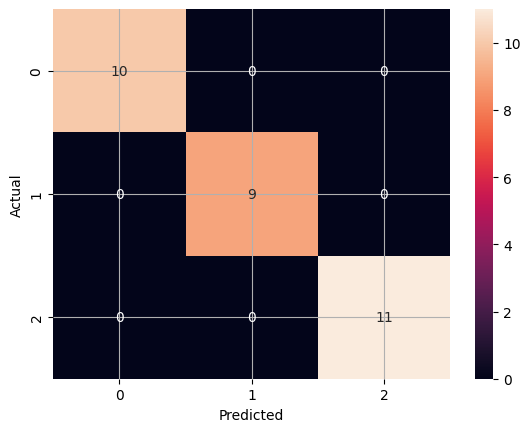

In [71]:
testConf = confusion_matrix(y_test, np.argmax(y_pred, axis = 1))
sns.heatmap(testConf, annot = True)
plt.grid(True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

#Visualizing target data

<ipython-input-72-732c5d1206b7>:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['iris-setosa', 'iris-versicolor' ,'iris-verginica'])


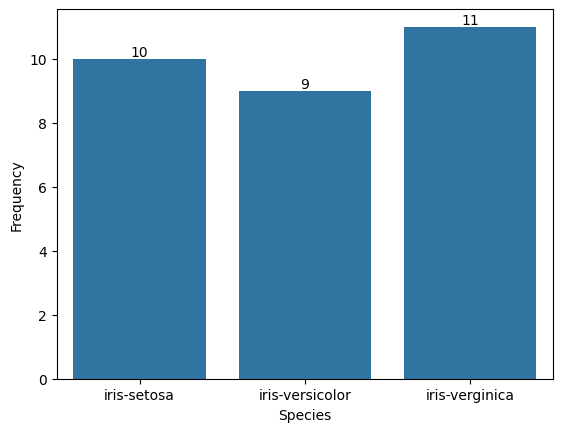

In [72]:
ax = sns.barplot(pd.Series(y_test).value_counts(), orient='v')
ax.set_xticklabels(['iris-setosa', 'iris-versicolor' ,'iris-verginica'])
ax.set_xlabel('Species')
ax.set_ylabel('Frequency')
for i in ax.containers:
  ax.bar_label(i)

#Creating a function to predict the output

In [124]:
#function to predict the species based on the given arguement
def predict_species(spLength, ptLength, ptWidht):
  values = [spLength, ptLength, ptWidht]
  # normalizing each values for species prediction
  for i, column in enumerate(iris1.columns.values[:-1]):
    mean = iris2[column].mean()
    std = iris2[column].std()
    values[i] = ((values[i] - mean) / std)

  #convert the values list in pytorch.tensor
  values_ten = t.tensor(values).float()
  #predict the species
  y_pred = irisnet(values_ten)
  #based on the index of maximum value returning the species of iris flowers
  max = t.argmax(y_pred.detach())
  if max == 0:
    return "Iris-setosa"
  elif max == 1:
    return "Iris-versicolor"
  else:
    return "Iris-virginica"

In [123]:
# for the inputs - (5.1, 1.4,	0.2) the species would be	Iris-setosa
print(f"Species for the given input : {predict_species(5.1, 1.4, 0.2)}")

Species for the given input : Iris-setosa
